<a href="https://colab.research.google.com/github/evgeniytr1509/HW_DS_4v1/blob/main/HW_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
pip install pandas

In [151]:
# Задание 1
#Загрузите датасет с помощью функции __pandas.read_csv__ в переменную __df__. Выведите первые 5 строчек, чтобы убедиться в корректном считывании данных:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# ссылка на файл CSV в Google Sheets
csv_url = 'https://docs.google.com/spreadsheets/d/1e2t3qhWDjNEcBmjWRrv-j5DjuqcgogGOCHfMkGHnOMM/gviz/tq?tqx=out:csv'

# Чтение данных из файла CSV и сохранение их в Pandas DataFrame
df = pd.read_csv(csv_url)
df1 = df.head(5)
#  'df' содержит данные из файла CSV в формате Pandas DataFrame
df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
# Для каждого дня проката известны следующие признаки:
# * _season_: 1 - весна, 2 - лето, 3 - осень, 4 - зима
# * _yr_: 0 - 2011, 1 - 2012
# * _mnth_: от 1 до 12
# * _holiday_: 0 - нет праздника, 1 - есть праздник
# * _weekday_: от 0 до 6
# * _workingday_: 0 - нерабочий день, 1 - рабочий день
# * _weathersit_: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
# * _temp_: температура в Цельсиях
# * _atemp_: температура по ощущениям в Цельсиях
# * _hum_: влажность
# * _windspeed(mph)_: скорость ветра в милях в час
# * _windspeed(ms)_: скорость ветра в метрах в секунду
# * _cnt_: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

# Итак, у нас есть вещественные, бинарные и номинальные (порядковые) признаки, и со всеми из них можно работать как с вещественными. С номинальныеми признаками тоже можно работать как с вещественными, потому что на них задан порядок.
# Давайте посмотрим на графиках, как целевой признак зависит от остальных

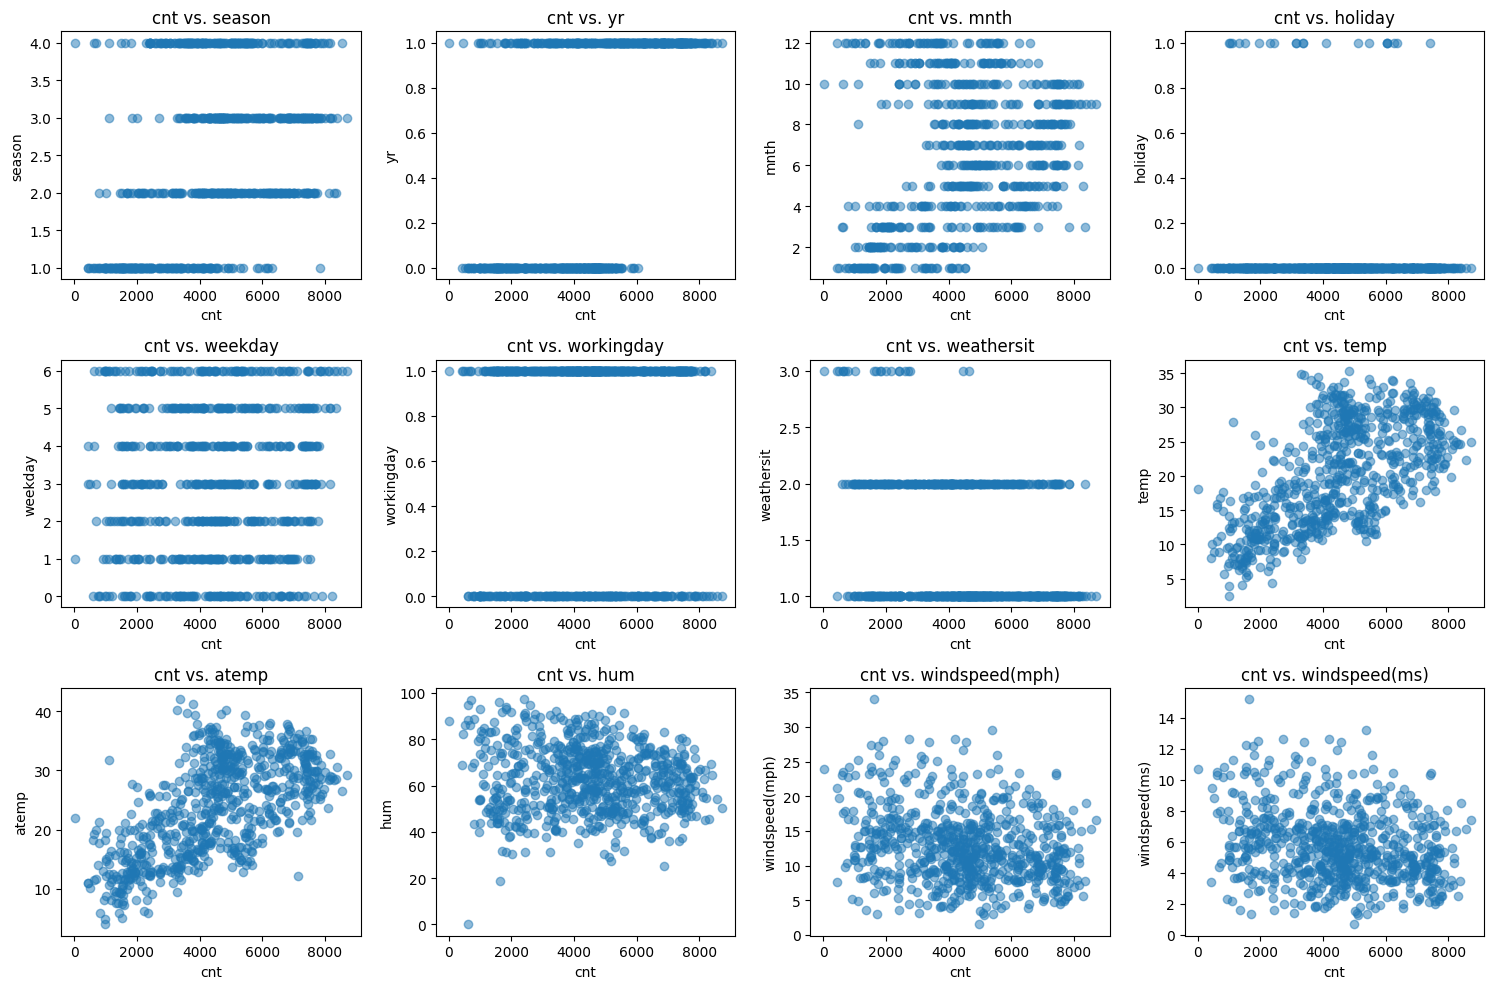

In [152]:
# Список атрибутов для построения графиков
attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# 12 графиков (по одному для каждого атрибута)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, attr in enumerate(attributes):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # график зависимости атрибута от 'cnt'
    ax.scatter(df['cnt'], df[attr], alpha=0.5)
    ax.set_title(f'cnt vs. {attr}')
    ax.set_xlabel('cnt')
    ax.set_ylabel(attr)

# Показать графики
plt.tight_layout()
plt.show()

In [ ]:
__Вопросы:__
1. Каков характер зависимости числа прокатов от месяца?
2. Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
Ответы
1. По результатам анализа графика наблюдается рост количество арендованных велосипедов с 1го месяца по 6й, далее с 6го по 9й месяц максимальное количество  арендованных велосипедов,и с 9го месяца по 12й наблюдается падение спроса на аренду.
2. Учитывая что количество арендованных велосипедов увеличивается с увеличением температуры можно сделать вывод что линейная зависимость количество арендованных велосипедов от temp и atemp

In [ ]:
## Задание 2
Давайте более строго оценим уровень линейной зависимости между признаками и целевой переменной. Хорошей мерой линейной зависимости между двумя векторами является корреляция Пирсона.
Нам уже приходилось иметь с ней дело раньше. Для ее вычисления в pandas можно использовать методы датафрейма: corr и corrwith.
Посчитайте корреляции всех признаков, кроме последнего, с последним с помощью метода `corrwith`.


In [153]:
filtered = df.drop(columns=['cnt'])
correlation_matrix = filtered.corr()
correlation_value = df.corrwith(df['cnt'])
correlation_value

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64

In [ ]:
В выборке есть признаки, коррелирующие с целевым, а значит, задачу можно решать линейными методами.
По графикам видно, что некоторые признаки похожи друг на друга. Поэтому давайте также посчитаем корреляции между вещественными признаками.

In [ ]:
## Задание 3

Посчитайте попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt
с помощью метода corr:


In [154]:
# Вычисление попарных корреляций между указанными признаками и 'cnt'
correlations = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()

# Вывод попарных корреляций
correlations

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [ ]:
На диагоналях, как и полагается, стоят единицы. Однако в матрице имеются еще две пары сильно коррелирующих столбцов: temp и atemp (коррелируют по своей природе) и два windspeed (потому что это просто перевод одних единиц в другие).
Далее мы увидим, что этот факт негативно сказывается на обучении линейной модели.
Напоследок посмотрим средние признаков (метод mean), чтобы оценить масштаб признаков и доли 1 у бинарных признаков.

In [ ]:
## Задание 4
Выведите средние признаков
# Put your code here
Признаки имеют разный масштаб, значит для дальнейшей работы нам лучше нормировать матрицу объекты-признаки.
### Проблема первая: коллинеарные признаки
Итак, в наших данных один признак дублирует другой, и есть еще два очень похожих. Конечно, мы могли бы сразу удалить дубликаты, но давайте посмотрим, как бы происходило обучение модели, если бы мы не заметили эту проблему.
Для начала проведем масштабирование, или стандартизацию признаков: из каждого признака вычтем его среднее и поделим на стандартное отклонение. Это можно сделать с помощью метода scale.
Кроме того, нужно перемешать выборку, это потребуется для кросс-валидации.
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]
Давайте обучим линейную регрессию на наших данных и посмотрим на веса признаков.
from sklearn.linear_model import LinearRegression


SyntaxError: ignored

In [155]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [157]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]
#Давайте обучим линейную регрессию на наших данных и посмотрим на веса признаков.
from sklearn.linear_model import LinearRegression
df.mean()
print("Веса признаков:")
for feature, weight in zip(df_shuffled.columns[:-1], feature_weights):
    print(f"{feature}: {weight}")

Веса признаков:
season: 570.8637960129914
yr: 1021.9653779400622
mnth: -141.3017451148728
holiday: -86.7593446245368
weekday: 137.22506441350538
workingday: 56.391881775973005
weathersit: -330.2264620440312
temp: 367.48373260182126
atemp: 585.5493861188597
hum: -145.61430569885857
windspeed(mph): 12457138390688.885
windspeed(ms): -12457138390887.346


In [169]:
## Задание 5

Создайте объект линейного регрессора, обучите его на всех данных и выведите веса модели (веса хранятся в переменной `coef_` класса регрессора).
Можно выводить пары (название признака, вес), воспользовавшись функцией `zip`, встроенной в язык python.
Названия признаков хранятся в переменной `df.columns`.

# Put your code here

In [160]:
from sklearn.linear_model import LinearRegression

# Создание линейного регрессора
regressor = LinearRegression()

# Обучение модели на всех данных
regressor.fit(X, y)

# Вывод весов модели (коэффициентов)
feature_weights = regressor.coef_

# Названия признаков
feature_names = df.columns[:-1]

# Вывод пар (название признака, вес)
for feature, weight in zip(feature_names, feature_weights):
    print(f"{feature}: {weight}")

season: 570.8637960129914
yr: 1021.9653779400622
mnth: -141.3017451148728
holiday: -86.7593446245368
weekday: 137.22506441350538
workingday: 56.391881775973005
weathersit: -330.2264620440312
temp: 367.48373260182126
atemp: 585.5493861188597
hum: -145.61430569885857
windspeed(mph): 12457138390688.885
windspeed(ms): -12457138390887.346


In [ ]:
Мы видим, что веса при линейно-зависимых признаках по модулю значительно больше, чем при других признаках.
Чтобы понять, почему так произошло, вспомним аналитическую формулу, по которой вычисляются веса линейной модели в методе наименьших квадратов:

w = (X^T*X)^(-1) * X^T *y

Если в X есть коллинеарные (линейно-зависимые) столбцы, матрица X^T*X становится вырожденной, и формула перестает быть корректной.
Чем более зависимы признаки, тем меньше определитель этой матрицы и тем хуже аппроксимация Xw \approx = y. Такая ситуацию называют _проблемой мультиколлинеарности_.
С парой (temp, atemp) чуть менее коррелирующих переменных такого не произошло, однако на практике всегда стоит внимательно следить за коэффициентами при похожих признаках.
Для того, чтобы решить проблему мультиколлинеарности нужно воспользоваться регуляризатором. К оптимизируемому функционалу прибавляют $L_1$ или $L_2$ норму весов, умноженную на коэффициент регуляризации $\alpha$. В первом случае метод называется Lasso, а во втором --- Ridge.

In [ ]:
### Задание 6
Давайте попробуем обучить линейные модели с L1 и L2-регуляризацией, а далее сравним их веса.
Обучите регрессоры Ridge и Lasso с параметрами по умолчанию и убедитесь, что проблема с весами решилась.
Обучите линейную модель с L1-регуляризацией (класс Lasso) и выведите веса
# Put your code here
Обучите линейную модель с L2-регуляризацией (класс Ridge) и выведите веса
# Put your code here


In [161]:
from sklearn.linear_model import Lasso, Ridge

# Создание модели Lasso
lasso_regressor = Lasso()

# Обучение модели Lasso
lasso_regressor.fit(X, y)

# Вывод весов модели Lasso
lasso_weights = lasso_regressor.coef_
print("Веса модели Lasso:")

for feature, weight in zip(feature_names, lasso_weights):
    print(f"{feature}: {weight}")

Веса модели Lasso:
season: 560.2416160308861
yr: 1019.4634940657196
mnth: -128.73062703678696
holiday: -86.15278133371106
weekday: 137.34789390496314
workingday: 55.21237064135668
weathersit: -332.3698569623487
temp: 376.3632362096943
atemp: 576.530793504555
hum: -144.12915500348583
windspeed(mph): -197.1396894024843
windspeed(ms): -2.8051404183533485e-08


In [162]:
# Создание модели Ridge
ridge_regressor = Ridge()

# Обучение модели Ridge
ridge_regressor.fit(X, y)

# Вывод весов модели Ridge
ridge_weights = ridge_regressor.coef_
print("\nВеса модели Ridge:")
for feature, weight in zip(feature_names, ridge_weights):
    print(f"{feature}: {weight}")


Веса модели Ridge:
season: 563.0645722520181
yr: 1018.9483787875305
mnth: -131.87332028247715
holiday: -86.74609799709232
weekday: 138.00511117871918
workingday: 55.90311037506467
weathersit: -332.34978849907367
temp: 386.45788919190807
atemp: 566.3470470600669
hum: -145.07132729867195
windspeed(mph): -99.25944108179067
windspeed(ms): -99.25944115434177


In [ ]:
### Задание 7

В отличие от L2-регуляризации, L1 обнуляет веса при некоторых признаках
Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$.
Для каждого значения коэффициента из alphas обучите регрессор Lasso и запишите веса список `coefs_lasso`, а затем обучите `Ridge` и запишите веса в список`coefs_ridge`.
Конвертируйте полученные списки в `np.array`.

alphas = np.arange(1, 500, 50)


In [163]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge

# Задайте значения alpha, которые вы хотите исследовать
alphas = np.arange(1, 500, 50)

# Создайте списки для хранения весов Lasso и Ridge
coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    # Создайте и обучите модель Lasso для текущего значения alpha
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)

    # Запишите веса модели Lasso в список coefs_lasso
    coefs_lasso.append(lasso_regressor.coef_)

    # Создайте и обучите модель Ridge для текущего значения alpha
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)

    # Запишите веса модели Ridge в список coefs_ridge
    coefs_ridge.append(ridge_regressor.coef_)

# Преобразуйте списки в массивы NumPy
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

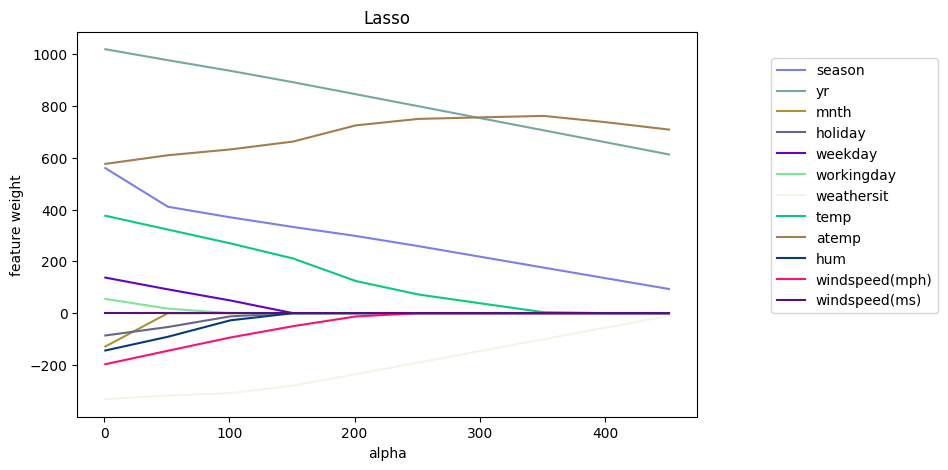

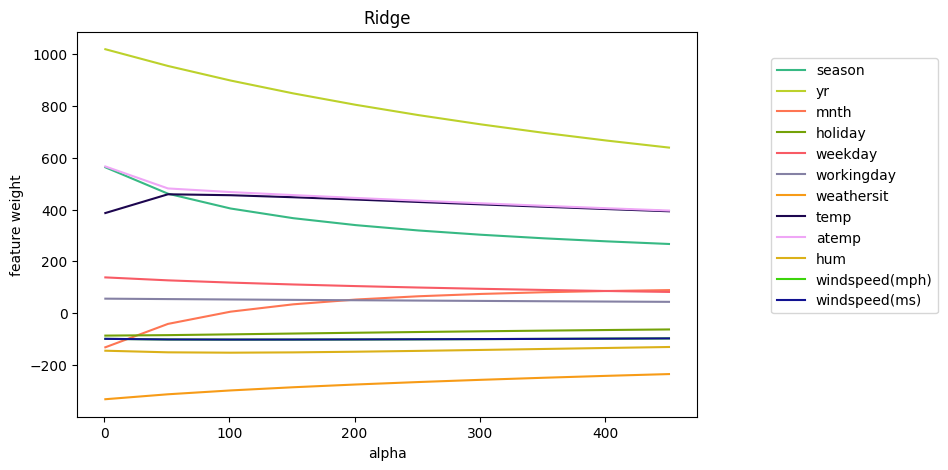

In [164]:
#Проанализируйте динамику весов при увеличении параметра регуляризации:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()


In [ ]:
Проанализируйте графики и дайте ответы на следующие вопросы.

1. Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
Ответ:
Lasso-регуляризатор агрессивнее уменьшает веса при одном и том же значении alpha по сравнению с Ridge-регуляризатором.

2. Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
Ответ:
Если значение alpha в методе Lasso становится очень большим, то многие веса признаков будут стремиться к нулю.
Это происходит из-за  свойства L1-регуляризации, которая добавляет в функцию потерь сумму абсолютных значений весов, умноженную на alpha.

3. Можно ли утверждать, что `Lasso` исключает один из признаков `windspeed` при любом значении alpha > 0`?
А Ridge?
Считается, что регуляризатор исключает признак, если коэффициент при нем меньше $10^{-3}$.
Ответ:
Да, можно утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0. Это происходит из-за  свойства L1-регуляризации, которая может обнулять веса при некоторых признаках.
Ridge-регуляризация не обнуляет веса признаков полностью. Она уменьшает веса признаков, но сохраняет их в модели.

4. Какой из регуляризаторов подойдет для отбора неинформативных признаков?
Ответ:
Для отбора неинформативных признаков, то есть признаков, которые мало влияют на целевую переменную и вносят шум в модель, более подходящим регуляризатором является Lasso.
Так как имеет способность обнулять веса признаков, что делает его эффективным инструментом для отбора неинформативных признаков.

In [ ]:
### Задание 8
Далее будем работать с `Lasso`.
Итак, мы видим, что при изменении alpha модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее alpha.
Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть `Mean Square Error`.

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных.
Если мы выберем одно разбиение выборки на обучающую и тестовую (это называется holdout), то настроимся на конкретные "новые" данные, и вновь можем переобучиться.
Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения alpha, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией,
то есть разделить выборку на K часте, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку.

Делать кросс-валидацию для регрессии в sklearn совсем просто: для этого есть специальный регрессор, LassoCV, который берет на вход список из alpha
и для каждого из них вычисляет MSE на кросс-валидации.
После обучения (если оставить параметр cv=3 по умолчанию) регрессор будет содержать переменную mse_path, матрицу размера len(alpha) x k, k = 3 (число блоков в кросс-валидации),
содержащую значения MSE на тесте для соответствующих запусков.
Кроме того, в переменной alpha_ будет храниться выбранное значение параметра регуляризации, а в coef_, традиционно, обученные веса, соответствующие этому alpha_.

Обратите внимание, что регрессор может менять порядок, в котором он проходит по alphas; для сопоставления с матрицей MSE лучше использовать переменную регрессора alphas_.
Обучите регрессор `LassoCV` на всех параметрах регуляризации из alpha. Постройте график _усредненного_ по строкам `MSE` в зависимости от `alpha` (используйте для этого функцию `create_plot`).

Выведите выбранное `alpha`, а также пары "признак-коэффициент" для обученного вектора коэффициентов.




In [165]:
df


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


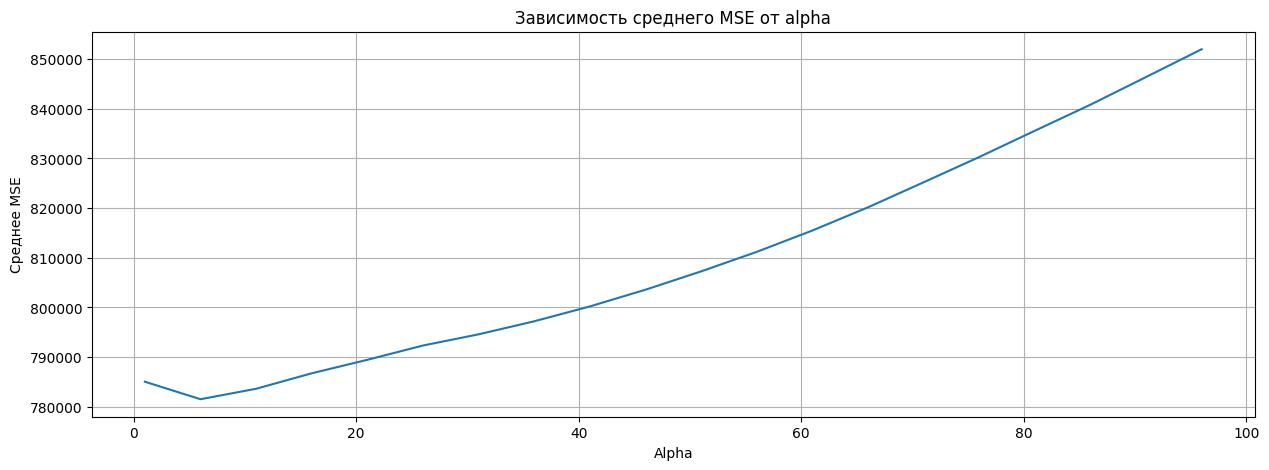

In [166]:
def create_plot(df, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], df))
    y = list(map(lambda e: e[1], df))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

title = "Зависимость среднего MSE от alpha"
xlabel = "Alpha"
ylabel = "Среднее MSE"


create_plot(data_to_plot, title, xlabel, ylabel)

Выбранное alpha: 6
season: 532.0189828413535
yr: 1015.0602226430595
mnth: -100.03952614356629
holiday: -83.29395987529904
weekday: 132.50446549095795
workingday: 51.557085614073735
weathersit: -330.5598567399817
temp: 370.67985503003405
atemp: 581.396931065498
hum: -140.00740550068844
windspeed(mph): -191.77140847135036
windspeed(ms): -2.6854702314758792e-08


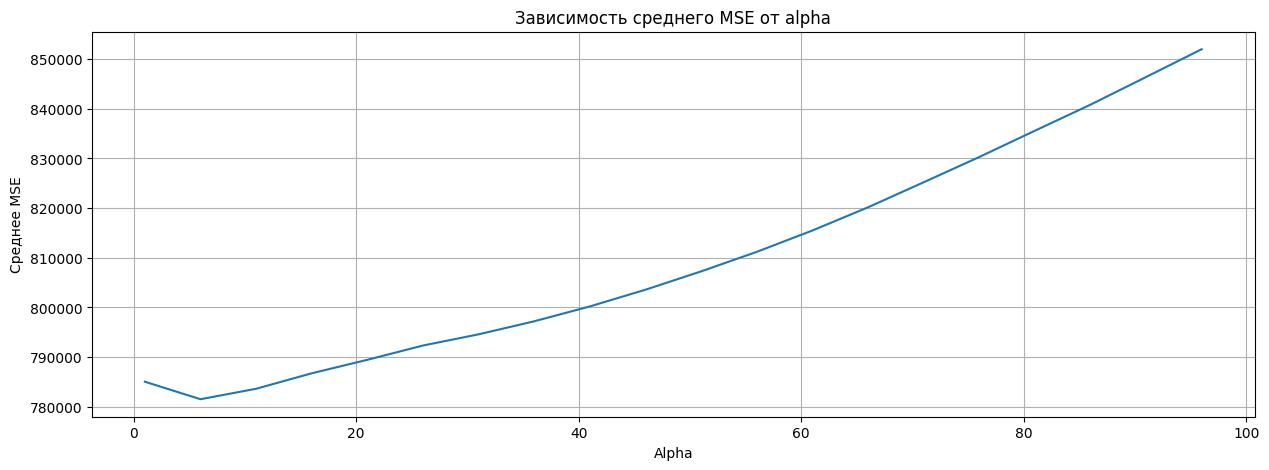

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

# значения alpha, для исследования
alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3)
# Обучение регрессора на данных
regressor.fit(X, y)

# выбранное alpha
selected_alpha = regressor.alpha_
print(f"Выбранное alpha: {selected_alpha}")

# пары "признак-коэффициент" для обученного вектора коэффициентов
feature_coef_pairs = list(zip(feature_names, regressor.coef_))
for feature, coef in feature_coef_pairs:
    print(f"{feature}: {coef}")

# график среднего MSE от alpha
mse_mean = np.mean(regressor.mse_path_, axis=1)
alpha_values = regressor.alphas_

data_to_plot = list(zip(alpha_values, mse_mean))

# извлечения x и y
x = [entry[0] for entry in data_to_plot]
y = [entry[1] for entry in data_to_plot]

plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.title("Зависимость среднего MSE от alpha")
plt.xlabel("Alpha")
plt.ylabel("Среднее MSE")
plt.grid()
plt.show()

In [ ]:
Итак, мы выбрали некоторый параметр регуляризации. Давайте посмотрим, какие бы мы выбирали alpha, если бы делили выборку только один раз на обучающую и тестовую, то есть рассмотрим траектории MSE, соответствующие отдельным блокам выборки.

In [ ]:
### Задание 9

Выведите значения `alpha`, соответствующие минимумам `MSE` на каждом разбиении (то есть по столбцам).
На трех отдельных графиках визуализируйте столбцы `mse_path_`.

In [122]:
Alphas with minimum MSE:
Alpha = 41, MSE = 843336.181499
Alpha = 6, MSE = 772598.495628
Alpha = 1, MSE = 745668.605961

Alphas with minimum MSE:
Alpha = 6, MSE = [733725.76040522 804415.01327126 806452.49878329]


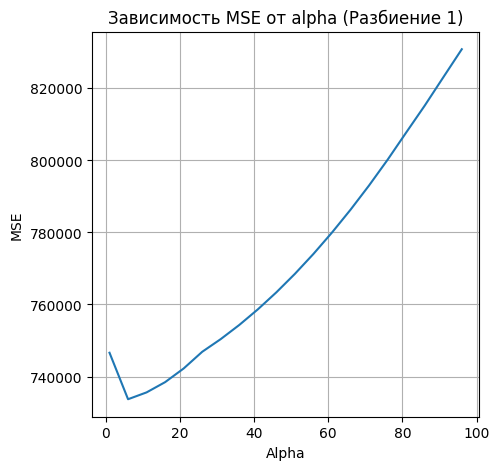

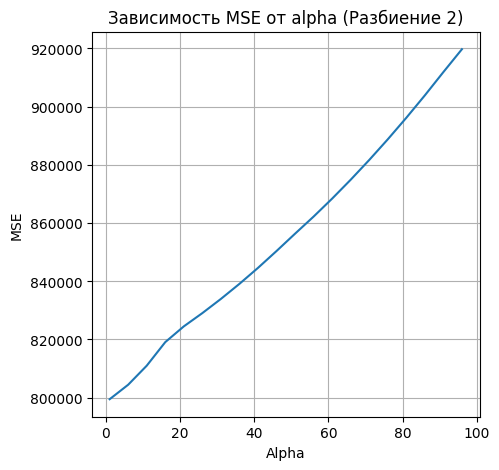

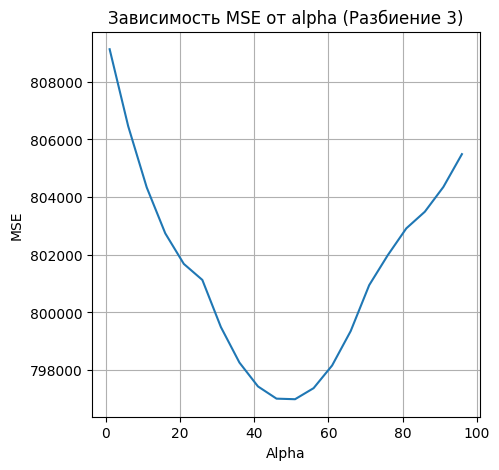

In [169]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression

# Вывод значений alpha, соответствующих минимумам MSE на каждом разбиении
min_alpha_indices = np.where(regressor.alphas_ == regressor.alpha_)[0]
min_mse_values = regressor.mse_path_[min_alpha_indices]
print("Alphas with minimum MSE:")

for alpha, mse in zip(regressor.alphas_[min_alpha_indices], min_mse_values):
    print(f"Alpha = {alpha}, MSE = {mse}")

# Визуализация столбцов mse_path_ на трех отдельных графиках
for i in range(3):
    plt.figure(figsize=(5, 5))
    plt.plot(regressor.alphas_, regressor.mse_path_[:, i])
    plt.title(f"Зависимость MSE от alpha (Разбиение {i+1})")
    plt.xlabel("Alpha")
    plt.ylabel("MSE")
    plt.grid()
    plt.show()



In [ ]:
Alphas with minimum MSE:
Alpha = 41, MSE = 843336.181499
Alpha = 6, MSE = 772598.495628
Alpha = 1, MSE = 745668.605961

In [ ]:
На каждом разбиении оптимальное значение `alpha` свое, и ему соответствует большое MSE на других разбиениях.
Получается, что мы настраиваемся на конкретные обучающие и контрольные выборки.
При выборе `alpha` на кросс-валидации мы выбираем нечто "среднее", что будет давать приемлемое значение метрики на разных разбиениях выборки.

In [ ]:
### Задание 10
Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Ответьте на следующие вопросы.

In [173]:
#### Вопрос 1
В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей `cnt` от этих признаков, которые мы рисовали в блоке "Знакомство с данными".
Видна ли возрастающая линейная зависимость `cnt` от этих признаков по графикам? Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды?
Ответ: Возрастающая линейная зависимость видна, это означает, что чем больше значение этих признаков, тем больше людей склонны арендовать велосипеды.

In [172]:
coef = regressor.coef_

# список пар признак-коэффициент
feature_coef_pairs = list(zip(feature_names, coef))
feature_coef_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

#4 признака с наибольшими положительными коэффициентами
top_positive_features = [pair for pair in feature_coef_pairs if pair[1] > 0][:4]

print("4 признака с наибольшими положительными коэффициентами:")
for feature, coef in top_positive_features:
    print(f"Признак: {feature}, Коэффициент: {coef}")

4 признака с наибольшими положительными коэффициентами:
Признак: yr, Коэффициент: 1015.0602226430595
Признак: atemp, Коэффициент: 581.396931065498
Признак: season, Коэффициент: 532.0189828413535
Признак: temp, Коэффициент: 370.67985503003405


In [ ]:
#### Вопрос 2
Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации.
Видна ли убывающая линейная зависимость?
Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?
Ответ: По выбранным признакам наблюдается убывающая линейная зависимость.
На графиках видно, что увеличение значений этих признаков сопровождается убывающей линейной зависимостью количества арендованных велосипедов
 Чем больше значение признаков, тем меньше аренд, это подтверждает отрицательные коэффициенты в модели.

In [174]:
coef = regressor.coef_

# "признак-коэффициент"
feature_coef_pairs = list(zip(feature_names, coef))
feature_coef_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

# 3 признака с наибольшими по модулю отрицательными коэффициентами
top_negative_features = [pair for pair in feature_coef_pairs if pair[1] < 0][:3]

print("3 признака с наибольшими по модулю отрицательными коэффициентами:")
for feature, coef in top_negative_features:
    print(f"Признак: {feature}, Коэффициент: {coef}")

3 признака с наибольшими по модулю отрицательными коэффициентами:
Признак: weathersit, Коэффициент: -330.5598567399817
Признак: windspeed(mph), Коэффициент: -191.77140847135036
Признак: hum, Коэффициент: -140.00740550068844


In [ ]:
#### Вопрос 3

Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3).
Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)?
Верно ли, что они никак не влияют на спрос на велосипеды?
Ответ: Признак с коэффициентам, близкими к нулю (менее чем 1e-3), в моделе Lasso проходит через 0 из-за регуляризации, применяемой этим методом.
 Lasso использует регуляризацию, которая способствует уменьшению коэффициентов при некоторых признаках до нуля, тем самым исключая их из модели так как они не оказчают влияние на спрос аренды велосипедов.
 Поэтому их можно считать малозначительными для прогнозирования

In [175]:
coef = regressor.coef_

# признаки, у которых коэффициенты близки к нулю (менее 1e-3)
near_zero_coef_features = [feature_names[i] for i, c in enumerate(coef) if abs(c) < 1e-3]

print("Признаки с коэффициентами, близкими к нулю:")
for feature in near_zero_coef_features:
    print(feature)

Признаки с коэффициентами, близкими к нулю:
windspeed(ms)


In [ ]:
### Заключение
Итак, мы посмотрели, как можно следить за адекватностью линейной модели, как отбирать признаки и как грамотно,
по возможности не настраиваясь на какую-то конкретную порцию данных, подбирать коэффициент регуляризации.
Стоит отметить, что с помощью кросс-валидации удобно подбирать лишь небольшое число параметров (1, 2, максимум 3),
потому что для каждой допустимой их комбинации нам приходится несколько раз обучать модель.
Такой процесс занимает много времени, особенно если нужно обучаться на больших объемах данных.